## Start date : July 11th, 2023 

### Data Visualizations of 2022 (can replace for years 2018, 2019 and 2020)  Business Data

Author : Kenthia

Goals:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
pd.set_option('display.max_columns', None)
from shapely.geometry import Point
import seaborn as sns
import fiona
import math #Hi testing
import plotly.express as px
from thefuzz import fuzz
from thefuzz import process
import random
from sklearn.linear_model import LassoCV
import statsmodels.api as sm

/opt/tljh/user/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#Read in the data and keep only US Continental States and DC
stores_general = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_general.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH','AK','HI']
stores_general = stores_general.drop(stores_general[stores_general['STATE'].isin(territories)].index)

In [3]:
#Create lists of Supermarkets/Companies owned by the Parent Coporations of Interest (Supermarkets/Companies were taken from Wikipedia)

#Ahold Delhaize owned supermarkets/companies
ahold = ["Bottom Dollar Food",
    "Food Lion",
    "FreshDirect",
    "Giant",
    "Giant Food",
    "Hannaford",
    "Stop & Shop",
    "Peapod",
    "Bfresh",
    "Eastside Marketplace",]

#WALMART owned supermarkets/companies
walmart = ["WALMART","SAM'S CLUB"]

#Krogers owned supermarkets/companies
kroger = ["Baker's",
    "City Market",
    "Dillons",
    "Food 4 Less",
    "Foods Co.",
    "Fred Meyer",
    "Fry's",
    "Gerbes",
    "Harris Teeter",
    "JayC",
    "King Soopers",
    "Kroger",
    "Mariano's",
    "Metro Market",
    "Pay Less",
    "Pick 'n Save",
    "QFC",
    "Ralphs",
    "Ruler Foods",
    "Smith's",]

# Albertsons owned supermarkets/companies
albertsons= ["Acme Markets",
    "Albertsons",
    "Albertsons Market",
    "Amigos",
    "Andronico's",
    "Balducci's",
    "Carrs",
    "Haggen",
    "Jewel-Osco",
    "Kings Food Markets",
    "Lucky",
    "Market Street",
    "Pak 'n Save",
    "Pavilions",
    "Randalls",
    "Safewa",
    "Shaw's",
    "Star Market",
    "Tom Thumb",
    "United Supermarkets",
    "Vons",
    "Buttrey Food and Drug",
    "Max Food and Drug",
    "Max Foods",
    "Skagg's Albertsons",
    "Super Saver",]

#Costco owned supermarkets/companies
costco = ["Costco"]

In [4]:
#Apply a string match through thefuzz that compares all stores to the parent corporations owned stores
#We decided to use a threshold of 77
#Generates a list of potential unique string matches
#The matches list's length is based on the number of different stores the parent corporation owns
#parent was initialized for each parent coporation (finished at costco)
'''
parent = costco
companies = stores_general["COMPANY"]

matches = []
for item in parent:
    for result in process.extract(item, companies, limit=len(parent)+1):
        store = result[0]
        score = result[1]
        if score >= 77 and store not in matches:
            matches.append(store)

print(matches)

# i.e. returns: ['COSTCO DELI']
'''

'\nparent = costco\ncompanies = stores_general["COMPANY"]\n\nmatches = []\nfor item in parent:\n    for result in process.extract(item, companies, limit=len(parent)+1):\n        store = result[0]\n        score = result[1]\n        if score >= 77 and store not in matches:\n            matches.append(store)\n\nprint(matches)\n\n# i.e. returns: [\'COSTCO DELI\']\n'

In [5]:
#Generated String Matches from above

#String matched brands owned by Walmart:
walmart_string = ['WALMART GROCERY PICKUP', 'WALMART GROCERY PKUP-DELIVERY', "SAM'S CLUB DELI"]
#Doesn't appear to have Walmart Neighborhood Stores

#String matched brands owned by Ahold Delhaize:
ahold_string = ['BOTTOM DOLLAR', 'DOLLAR DOLLAR', 'FOOD', 'FOOD 4 LESS', 'FOOD LION', 'FRESH DIRECT', 'REC', 'FRESH', 'H & H', 'S & S', 'FRESHII', 'GIANT', 'GIANT EAGLE', 'GIANT EAGLE FLORAL', 'GIANT FOOD', 'HANNAFORD', 'STOP & SHOP', 'PEA POD', 'BFRESH MARKET', 'REFRESH', 'EASTSIDE MARKETPLACE', 'WESTSIDE MARKETPLACE', 'MARKET', 'E MARKET', 'MARKETPLACE']

#String matched brands owned by Kroger:
kroger_string = ["BAKER'S", 'S & S', 'BAKERS', "BAKER'S GAS & WELD SUPLS INC", "BAKER'S GAS", "BAKER'S MARKET", "BAKER'S PRO FARM LLC", 'BAKER STREET MARKET', "BAKER'S KWIK SHOP", 'CITY MARKET', 'DILLONS', 'FOOD 4 LESS', 'FOODS CO', 'FRED MEYER', "FRY'S FOOD", 'GERBES SUPER MARKET', 'GERBES SUPER MARKETS', 'GE', 'GERBES SUPERMARKET', 'HARRIS TEETER', 'JAYC', "JAYCEE'S", 'JAYCON', 'CITY-RALEIGH-JAYCEE PARK-CMNTY', 'JAYCE MINIMARKET', 'NAY & JAY', 'KING SOOPERS', 'KROGER', "MARIANO'S", 'METRO MARKET', 'METRO MINI MARKET', 'MARKET MARKET', 'PAY LESS LIQUORS', 'PAY LESS SUPER MARKETS', 'PAY LESS GAS & FOOD', 'PAY LESS IGA', 'FOOD FOR LESS', 'FAR LESS FOOD MARKET', 'MORE FOR LESS', 'PRICE LESS FOODS', 'COST LESS FOODS CO', "PICK'N SAVE", 'QFC', 'RALPHS', 'RULER FOODS', "SMITH'S"]

#String matched brands owned by Costco
costco_string = ["COSTCO DELI"]

#String matched brands owned by Albertsons
albertsons_string = ['ACME MARKETS', 'ALBERTSONS', 'ALBERTSONS MARKET', 'MARKET MARKET', 'MARKET', '2 AMIGOS', 'AMIGO', 'LOS AMIGOS DISTRIBUTING', 'DOS AMIGOS MARKET', '3 AMIGOS BEER WINE-FOOD STORE', 'THREE AMIGOS', 'AMIGOS FOOD MART', 'LOS AMIGOS', 'AMIGOS MKT LOS', 'AMIGOS MARKET 7', 'TIENDA LOS AMIGOS', 'AMIGOS CONVENIENCE STORE', 'LOS AMIGOS UNO', 'AMIGOS LATIN GROCERY', 'AMIGOS UNITED', 'AMIGOS FOOD MART LLC', 'LOS AMIGOS MARKET', 'LOS AMIGOS SUPERMARKET', 'ICO', "ANDRONICO'S COMMUNITY MARKETS", "KRAUSZER'S FOOD STORE", "CASEY'S", "MR T'S", "SEVEN'S", "PATTY'S PANTRY & DELI", "CASHION'S QUIK STOP", 'E C F S SNACKS LLC', "MICKEY'S T-MART INC", "STATLER'S COUNTRY MART", "MIKE'S CONVENIENCE", "BELL'S ROWLESBURG GROCERY", "SOCCORSI'S GROCERY & SUBS", 'CC', "BALDUCCI'S FOOD LOVER'S MARKET", "DANIEL'S MARKET", "GRILLO'S MARKET", 'S & G CONVENIENCE MART', "NANCY'S FOODMART", "MILLER'S MARKETS", "MAYNARD'S OF FLANDREAU", "SKIP'S", "HARDESTY'S EXPRESS MART LLC", "KASSAR'S FOOD & GIFTS", "JERRY'S MARKET & LIQUOR", "SHELLY'S GROCERY & BAKERY LLC", 'CARRS/SAFEWAY', 'CARRS SAFEWAY', 'CARRS QUALITY CTR PALMER SHPG', 'BIG CHEAP CASH & CARR', 'C & B USED CARS', 'HAGGEN', 'HAGGEN FOOD & PHARMACY', 'HAGGEN SUPPORT CTR', 'HAGGEN FOOD', 'GE', 'JEWEL-OSCO', 'KINGS FOOD MARKETS', 'KINGS FOOD MARKET', "KING'S FOOD MARKET", "KING'S FOODMARKET", 'KINGS FOOD MART', 'FOOD', 'LUCKY', 'LUCKY 3', 'LUCKY 7', "LUCKY'S", 'LUCKY 8', 'LUCKYS', 'LUCKY SEVEN FOOD STORE', 'LUCKY FOOD FARMERS MARKET', 'LUCKY GROCERY & DELI', 'LUCKY DOLLAR', 'LUCKY CHARM CONVENIENCE STORE', 'LUCKY STAR MARKET LLC', 'LUCKY FOOD MART LLC', 'LUCKY MARKET', "LUCKY'S STATION", 'LUCKY MARKET LLC', "LUCKY'S SUPER MARKET", 'MARKET STREET', "PAK 'N SAVE", 'U-SAVE FOOD STORE', 'GOLD LINE GRAB N GO', 'INDO PAK SUPERMARKET', 'STOP N GO FOOD MART', 'STOP N GO ENTERPRISES INC', "OCALA SHOP N' PLAY LLC", 'J & N MINI MART 2', "GRAB 'N GO MART LLC", 'KWIK PAK FOOD MART', "SHOP 'N SAVE EXPRESS", 'PIC-N-SAVE MARKET', 'U-SAVE TRAVEL PLAZA', "UP NORT' SWEET N SAVORY", 'STOP N SHOP WESTFIELD', "SACK 'N SAVE FOOD", "STOP 'N GO MARKETS OF TEXAS", 'CARTA N SHORE GARAGE', 'MASALA INDO PAK GROCERS', 'IN N OUT FOOD & GAS LLC', "GAS 'N' GO FOOD & BEVERAGE", 'N A M C COMMUNITY MARKET INC', 'PAVILIONS', 'RANDALLS', 'SAFEWAY', 'S & S', "SHAW'S SUPERMARKET", "SHAW'S SUPERMARKETS INC", 'STAR MARKET', 'TOM THUMB', 'UNITED SUPERMARKETS', 'VONS', 'FOOD 4 LESS', 'FOOD MART', 'FOOD LION', 'HERA FOOD MART', 'FOOD TOWN', 'FOOD FAIR', 'OHM FOOD MART', "D'S FOOD STORE", 'FOOD EXPRESS', 'E Z FOOD MART', 'JR FOOD MART', 'EXPRESS FOOD', 'MR FOOD MART', 'CITGO CONVENIENT FOOD MART', 'GREEN ACRES HEALTH FOOD STORE', 'FRIENDSHIP FOOD STORES INC', 'VERISTAS AFRICAN FOOD STORE', 'ILLINOIS VALLEY FOOD & DELI', "FRY'S FOOD", 'FOOD CITY', 'MAX FOODS', 'MAXI FOODS', 'FOODS', 'FOOD MAX', 'SUPER ONE FOODS', 'SUNSHINE FOODS', 'JAMBOREE FOODS', 'DAY STAR FOODS', "SULLIVAN'S FOODS", 'AFFILIATED FOODS CO-OP', "JENSEN'S FINEST FOODS", 'EAST DAKOTAH NATURAL FOODS', "JENSEN'S FOODS", 'RITE PRICE FOODS', 'VALLEY CENTER FOODS', 'SUPER SAVER', 'SUPER SAVE', 'SUPER SAVER INC', 'SUPER', 'SUPER SAVER COST PLUS', "SAAR'S SUPER SAVER FOODS"]

In [6]:
#Cleaned lists from the string matches of supermarkets/companies actually owned by the parent coprporation
#***NOTE***There will be a margin of error from this process because stores were validated through manual checks
#***NOTE***It was unrealistic to manually inspect every store generated this way so there will be supermarkets/companies that do not actually belong to the parent coporation
#***NOTE***STOP AND SHOP SUPERMARKET was missing from string match so it was manually added
#KROGERS FINAL
kroger_clean = ["BAKER'S",
 'BAKERS', 
 'CITY MARKET',
 'DILLONS',
 'FOOD 4 LESS', 
 'FOODS CO', 
 'FRED MEYER', 
 "FRY'S FOOD",
 'GERBES SUPER MARKET',  
 'GERBES SUPER MARKETS', 
 'GERBES SUPERMARKET', 
 'HARRIS TEETER', 
 'JAYC', 
 'KING SOOPERS',
 'KROGER',
 "MARIANO'S",
 'METRO MARKET', 
 'PAY LESS SUPER MARKETS',
 "PICK'N SAVE", 
 'QFC', 
 'RALPHS', 
 'RULER FOODS', 
 "SMITH'S","KROGER PICK UP"]

#Ahold Delhaize FINAL:
ahold_clean = [ 'FOOD LION',
 'GIANT',
 'GIANT EAGLE',
 'GIANT FOOD',
 'HANNAFORD',
 'STOP & SHOP',
 'BFRESH MARKET',
 'EASTSIDE MARKETPLACE','STOP & SHOP SUPERMARKET']

#WALMART FINAL:
walmart_clean = ['WALMART GROCERY PICKUP',
 'WALMART GROCERY PKUP-DELIVERY', 
 "SAM'S CLUB DELI"]

#COSTCO FINAL:
costco_clean = ["COSTCO DELI"]

#ALBERTSONS FINAL:
albertsons_clean = ['ACME MARKETS',
'ALBERTSONS',
'ALBERTSONS MARKET',
'AMIGOS UNITED',
"ANDRONICO'S COMMUNITY MARKETS",
'CARRS/SAFEWAY',
'CARRS SAFEWAY',
'HAGGEN',
'HAGGEN FOOD & PHARMACY',
'HAGGEN FOOD',
'JEWEL-OSCO',
'KINGS FOOD MARKETS',
'KINGS FOOD MARKET',
'MARKET STREET',
"PAK 'N SAVE",
'PAVILIONS',
'RANDALLS',
'SAFEWAY',
'STAR MARKET',
'TOM THUMB',
'UNITED SUPERMARKETS',
'VONS',
'SUPER SAVER',
'CARRS QUALITY CTR PALMER SHPG',
 "SAAR'S SUPER SAVER FOODS"]

In [7]:
#Records the removed values from the string matching for each store
#"Removed" list can be used to see the values we chose to remove from the string match
kroger_removed = [value for value in kroger_string if value not in kroger_clean]
ahold_removed = [value for value in ahold_string if value not in ahold_clean]
walmart_removed = [value for value in walmart_string if value not in walmart_clean]
costco_removed = [value for value in costco_string if value not in costco_clean]
albertsons_removed = [value for value in albertsons_string if value not in albertsons_string]

In [8]:
def parent_name(row):
    '''Creates a new column called "PARENT NAME" based on the cleaned string match list''' 
    '''The new column generalizes individual companies into their parent coporation (ie. Walmart, Krogers, etc.)''' 
    companies = row['COMPANY']  
    
    if companies in walmart_clean:
        return 'WALMART'
    if companies in costco_clean:
        return 'COSTCO'
    if companies in ahold_clean:
        return 'AHOLD DELHAIZE'
    if companies in kroger_clean:
        return 'KROGER'
    if companies in albertsons_clean:
        return 'ALBERTSONS'
    else:
        return 'OTHER'

stores_general['STORE TYPE'] = stores_general.apply(parent_name, axis=1)

In [9]:
#Locate the unique primary sic codes present within the supermarkets/companies owned by the parent corporations of interest
#These unique primary SIC codes will be used as the basis of how we filter the main dataset to include only relevant supermarkets/companies (ie. removing convenient stores)

#Step 1: Filter a dataframe based on parent coporations
parent_companies = ['WALMART', 'COSTCO', 'KROGER', 'AHOLD DELHAIZE','ALBERTSONS']
filtered_df = stores_general[stores_general['STORE TYPE'].isin(parent_companies)]

# Step 2: Extract the PRIMARY SIC CODES values
primary_sic_codes = filtered_df['PRIMARY SIC CODE']

# Step 3: Get the unique PRIMARY SIC CODES values
unique_sic_codes = primary_sic_codes.unique()

# Print the unique PRIMARY SIC CODES
unique_sic_codes = np.delete(unique_sic_codes,(np.where(unique_sic_codes == 541103)))

#***NOTE remove SIC Code 541103 since it contains the SIC code for convenient stores

In [10]:
def sic_filter(df):
    """
    Filters the dataframe to keep only the stores with specific primary SIC codes,
    including NaN values. SIC codes are from the parent corporation's subsidiary's Primary SIC codes

    The function takes in an unfiltered dataframe as a parameter.
    The function returns a filtered dataframe.
    """
    sic_codes = unique_sic_codes
    filtered_df = df[df['PRIMARY SIC CODE'].isin(sic_codes) | df['PRIMARY SIC CODE'].isna()]
    return filtered_df

supermarkets = sic_filter(stores_general)

In [11]:
def update_parent_name(df):
    """
    Helps account for erros in manual string matching selection
    Checked for different Parent Numbers within each Parent Group and if the company had a different Parent Number 
    than the accepted, the company was grouped to other
    """
    accepted_parent_numbers = {
        238136725.0: "AHOLD DELHAIZE",
        5995907.0: "ALBERTSONS",
        7521503.0: "KROGER",
        5889993.0: "WALMART",
        441311800.0: "COSTCO"
    }
    
    for parent_number, parent_name in accepted_parent_numbers.items():
        df.loc[(df["PARENT NUMBER"] != parent_number) & (df["STORE TYPE"] == parent_name), "STORE TYPE"] = "OTHER"
    
    return df
supermarkets = update_parent_name(supermarkets)
#Assigns Parent Number of Albertsons to CARRS
supermarkets.loc[supermarkets[supermarkets["COMPANY"] == "CARRS QUALITY CTR PALMER SHPG"].index, "PARENT NUMBER"] = 5995907.0

In [12]:
def process_dataframe(df):
    """
    Process the dataframe by generating parent numbers for companies.
    Generates a random parent number from 0-9999 if the original parent number was NaN.
    If the same company appears with a parent number of NaN, it doesn't get a new parent number; it gets the same parent number as its counterpart.
    LIMITATIONS: This function does not account for when two different corporations have companies with the same name;
    it will ultimately group companies with the same name into one parent number even if they are actually different organizations.
    This type of anomaly is infrequent, so we will overlook this issue.
    """

    companies = {}

    def process_row(row):
        company = row["COMPANY"]
        parent_number = row["PARENT NUMBER"]

        if pd.isna(parent_number):
            if company in companies:
                existing_parent = companies[company]
                if not pd.isna(existing_parent):
                    row["PARENT NUMBER"] = existing_parent
            else:
                new_parent_number = random.randrange(0, 9999)
                companies[company] = new_parent_number
                row["PARENT NUMBER"] = new_parent_number
        else:
            companies[company] = parent_number

        return row

    df_na = df.loc[df["PARENT NUMBER"].isna()] 
    company_list = df_na["COMPANY"].unique().tolist()
    df = df.apply(process_row, axis=1)

    return df

supermarkets = process_dataframe(supermarkets)

In [13]:
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isna()].shape

(1415, 54)

In [14]:
#Fill NaN values for SALES VOLUME (9) - LOCATION
# Locate Companies without a designated parent number (indicated by a parent number of < 9999)
# Split these companies arbitrarily to account for true independent stores and non-independent stores (if there are only 3 companies under the parent number it is classified as independent other)

non_parent_group = supermarkets[supermarkets["PARENT NUMBER"] < 9999].groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
independent_non_parent = non_parent_group[non_parent_group["SALES VOLUME (9) - LOCATION"] < 4]
non_par = non_parent_group[non_parent_group["SALES VOLUME (9) - LOCATION"] > 3]

non_parent = supermarkets[supermarkets["FIPS CODE"].isin(non_par["FIPS CODE"])]
np_independent = supermarkets[supermarkets["FIPS CODE"].isin(independent_non_parent["FIPS CODE"])]

# Calculate FIPS CODE-specific medians
median_np = non_parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_np_ind = np_independent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()

# Locate Companies with a designated parent number (indicated by a parent number of > 9999)
# Split these companies arbitrarily to account for true independent stores and non-independent stores (if there are only 3 companies under the parent number it is classified as independent other)

parent_group = supermarkets[supermarkets["PARENT NUMBER"] > 9999].groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
independent_parent = parent_group[parent_group["SALES VOLUME (9) - LOCATION"] < 4]
p = parent_group[parent_group["SALES VOLUME (9) - LOCATION"] > 3]

parent = supermarkets[supermarkets["FIPS CODE"].isin(parent_group["FIPS CODE"])]
independent_parent = supermarkets[supermarkets["FIPS CODE"].isin(independent_parent["FIPS CODE"])]

# Calculate FIPS CODE-specific medians
median_np = non_parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_np_ind = np_independent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_parent = parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_parent_ind = independent_parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()

# Update missing values based on FIPS CODE-specific medians
supermarkets = supermarkets.merge(median_np, on="FIPS CODE", suffixes=("", "_median_np"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_np"]

supermarkets = supermarkets.merge(median_np_ind, on="FIPS CODE", suffixes=("", "_median_np_ind"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_np_ind"]

supermarkets = supermarkets.merge(median_parent, on="FIPS CODE", suffixes=("", "_median_parent"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_parent"]

supermarkets = supermarkets.merge(median_parent_ind, on="FIPS CODE", suffixes=("", "_median_parent_ind"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_parent_ind"]

# Drop redundant columns
supermarkets.drop(["SALES VOLUME (9) - LOCATION_median_np", "SALES VOLUME (9) - LOCATION_median_np_ind", "SALES VOLUME (9) - LOCATION_median_parent", "SALES VOLUME (9) - LOCATION_median_parent_ind"], axis=1, inplace=True)

In [15]:
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isna()]

COMPANY  ADDRESS LINE 1       CITY STATE  ZIPCODE    ZIP4  \
36601  OAK STREET MARKET      300 OAK ST  WAKEFIELD    NE    68784  5225.0   
73751     KROGER PICK UP  120 PINHOOK RD  MT OLIVET    KY    41064     NaN   

       COUNTY CODE  AREA CODE  IDCODE LOCATION EMPLOYEE SIZE CODE  \
36601         51.0        402       2                           A   
73751        201.0        859       2                         NaN   

      LOCATION SALES VOLUME CODE  PRIMARY SIC CODE        SIC6_DESCRIPTIONS  \
36601                        NaN            541105           GROCERS-RETAIL   
73751                        NaN            541110  GROCERY PICKUP-CURBSIDE   

       PRIMARY NAICS CODE                                NAICS8 DESCRIPTIONS  \
36601          44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
73751                 NaN                                                NaN   

       SIC CODE SIC6_DESCRIPTIONS (SIC)  SIC CODE 1 SIC6_DESCRIPTIONS (SIC1)  \
36601       NaN                     NaN         NaN                      NaN   
73751       NaN                     NaN         NaN                      NaN   

       SIC CODE 2 SIC6_DESCRIPTIONS(SIC2)  SIC CODE 3 SIC6_DESCRIPTIONS(SIC3)  \
36601         NaN                     NaN         NaN                     NaN   
73751         NaN                     NaN         NaN                     NaN   

       SIC CODE 4 SIC6_DESCRIPTIONS(SIC4)  ARCHIVE VERSION YEAR  \
36601         NaN                     NaN                  2022   
73751         NaN                     NaN                  2022   

       YELLOW PAGE CODE  EMPLOYEE SIZE (5) - LOCATION  \
36601               NaN                           4.0   
73751               NaN                           NaN   

       SALES VOLUME (9) - LOCATION  BUSINESS STATUS CODE  \
36601                          NaN                     9   
73751                          NaN                     2   

      INDUSTRY SPECIFIC FIRST BYTE  YEAR ESTABLISHED  OFFICE SIZE CODE  \
36601                          NaN            2022.0               NaN   
73751                          NaN               NaN               NaN   

       COMPANY HOLDING STATUS        ABI  SUBSIDIARY NUMBER  PARENT NUMBER  \
36601                     NaN  765155855                NaN         5376.0   
73751                     NaN  778830535                NaN      7521503.0   

       PARENT ACTUAL EMPLOYEE SIZE  PARENT ACTUAL SALES VOLUME  \
36601                          NaN                         NaN   
73751                       1200.0                 137888000.0   

      PARENT EMPLOYEE SIZE CODE PARENT SALES VOLUME CODE  SITE NUMBER  \
36601                       NaN                      NaN          NaN   
73751                         I                        I          NaN   

      ADDRESS TYPE INDICATOR  POPULATION CODE  CENSUS TRACT  CENSUS BLOCK  \
36601                    NaN                3      977800.0           4.0   
73751                    NaN                3      970100.0           1.0   

        LATITUDE  LONGITUDE MATCH CODE  CBSA CODE  CBSA LEVEL  CSA CODE  \
36601  42.268865 -96.862423          P    43580.0         2.0       0.0   
73751  38.523000 -84.068600          X        0.0         NaN       0.0   

       FIPS CODE STORE TYPE  
36601    31051.0      OTHER  
73751    21201.0     KROGER

In [16]:
#Finds the Percent of Brick and Mortar and Store Count for Each Major Parent Company and Other
store_count_us = supermarkets.groupby('STORE TYPE').count()[["CITY"]].reset_index().rename(columns={"CITY":"STORE COUNT"})
store_count_us['Percent'] = store_count_us['STORE COUNT'] / supermarkets.shape[0] * 100

store_count_us

STORE TYPE  STORE COUNT    Percent
0  AHOLD DELHAIZE         1713   2.198691
1      ALBERTSONS         2145   2.753177
2          COSTCO           29   0.037222
3          KROGER         2729   3.502760
4           OTHER        67599  86.765499
5         WALMART         3695   4.742652

# Mapping Store Locations of the Top grocery stores in the US


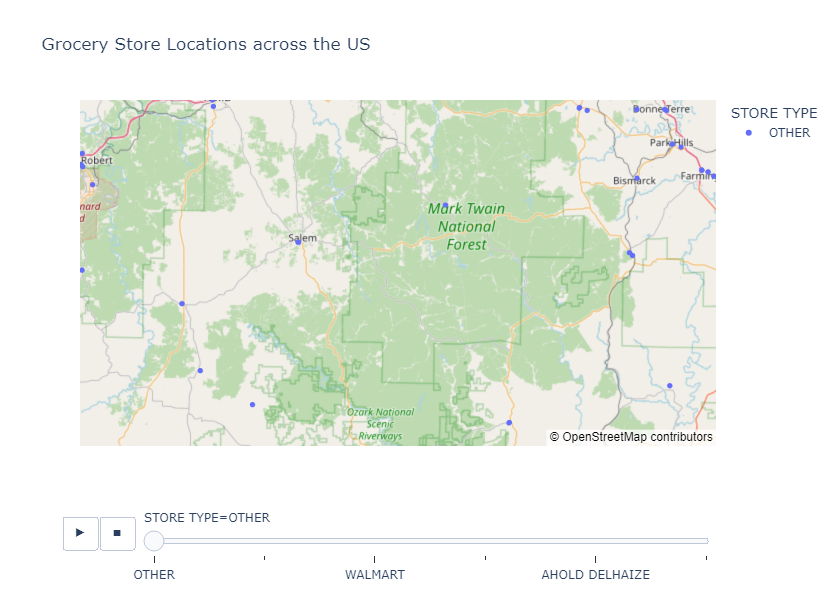

In [23]:

#df is the dataframe you would use, latitude is the latitude metric, longitude is the longitude metric, variable is the column you want to colour by,
#timelapse is the duration over which you want to observe your data/if not time, you cam filter using this, maptitle is the title you want for your map.
def scatterMapBox(df,latitude,longitude,variable,filters,maptitle):
    fig = px.scatter_mapbox(df, lat=latitude, lon=longitude, color=variable, 
                            color_continuous_scale=["black", "purple", "red" ],
                            animation_frame= filters, size_max=30, height = 600,
                            width = 1000, title= maptitle, mapbox_style="open-street-map")
    return fig


figureExample = scatterMapBox(supermarkets,'LATITUDE','LONGITUDE','STORE TYPE','STORE TYPE','Grocery Store Locations across the US')
figureExample.show()

## Including the geographic overlap of the two brands ( Alberstons and Kroger)

The resulting map shows geographic overlap between the two brands in several areas: Seattle, Los Angeles, Denver, Dallas, Chicago, and Washington DC. In these cities, previously competing grocery stores will now be owned by the same company. If we assume that all Albertsons and Kroger grocery stores will remain open after the merger, the market share of Albertsons-Kroger will increase in areas with significant overlap. This may make it more difficult for other grocery stores with smaller market shares in these regions to compete with Albertsons-Kroger.


Source: Caliper.com

# Chicago,Illinois Analysis 

In [ ]:
supermarkets_chi = supermarkets.loc[supermarkets["CITY"] == "CHICAGO"]
supermarkets_chi

#There are 702 Supermarkets/companies in Chicago

# Washington,DC Analysis

In [ ]:
supermarkets_dc = supermarkets.loc[supermarkets["STATE"] == "DC"]
supermarkets_dc

#There are 184 Supermarkets/companies in DC